In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/04_Apr.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,25.000000,61.000000,1,7,0,2361.0,2250.0,2309.0,2382.0,2337.0,2266.0,2368.583333,2475.0
1,24.916667,61.583333,1,7,0,2394.0,2251.0,2273.0,2298.0,2242.0,2203.0,2380.666667,2418.0
2,24.833333,62.166667,1,7,0,2640.0,2355.0,2247.0,2239.0,2040.0,2055.0,2379.083333,2228.0
3,24.750000,62.750000,1,7,0,2560.0,2347.0,2270.0,2254.0,2093.0,2039.0,2373.833333,2207.0
4,24.666667,63.333333,2,7,0,2475.0,2361.0,2250.0,2209.0,2076.0,2025.0,2367.583333,2175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,27.982450,33.440678,23,4,1,2893.0,2902.0,2927.0,2931.0,3129.0,2893.0,2902.750000,2907.0
8732,27.982450,33.440678,24,4,1,2893.0,2906.0,2900.0,2896.0,3118.0,2715.0,2904.416667,2920.0
8733,27.982450,33.440678,24,4,1,2918.0,2895.0,2913.0,2868.0,3081.0,2765.0,2904.916667,2919.0
8734,27.312450,33.440678,24,4,1,2917.0,2877.0,2912.0,2898.0,3041.0,2768.0,2898.250000,2832.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8736 non-null   float64
 1   Hum     8736 non-null   float64
 2   A       8736 non-null   int64  
 3   B       8736 non-null   int64  
 4   C       8736 non-null   int64  
 5   D       8736 non-null   float64
 6   E       8736 non-null   float64
 7   F       8736 non-null   float64
 8   G       8736 non-null   float64
 9   H       8736 non-null   float64
 10  I       8736 non-null   float64
 11  J       8736 non-null   float64
 12  Cons    8736 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 887.4 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8736 non-null   float64
 1   Hum     8736 non-null   float64
 2   A       8736 non-null   float64
 3   B       8736 non-null   float64
 4   C       8736 non-null   float64
 5   D       8736 non-null   float64
 6   E       8736 non-null   float64
 7   F       8736 non-null   float64
 8   G       8736 non-null   float64
 9   H       8736 non-null   float64
 10  I       8736 non-null   float64
 11  J       8736 non-null   float64
 12  Cons    8736 non-null   float64
dtypes: float64(13)
memory usage: 887.4 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 4800][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.158209,-0.740413,1.238689,-1.660674,1.511373,-1.457264,-0.237839,-0.623175,-0.418753,-0.162010,-0.272920,-0.486151,-0.224629
1,-0.039674,-0.756691,1.277026,-1.660674,1.511373,-1.457264,-0.123269,-0.619703,-0.543769,-0.453566,-0.614835,-0.720941,-0.180076
2,-0.699287,-0.772969,1.315363,-1.660674,1.511373,-1.457264,0.730797,-0.258623,-0.634059,-0.658350,-1.341853,-1.272511,-0.185914
3,-0.772191,-0.789246,1.353699,-1.660674,1.511373,-1.457264,0.453052,-0.286398,-0.554187,-0.606286,-1.151101,-1.332140,-0.205271
4,-0.883284,-0.805524,1.392036,-1.516238,1.511373,-1.457264,0.157948,-0.237791,-0.623641,-0.762477,-1.212285,-1.384316,-0.228316


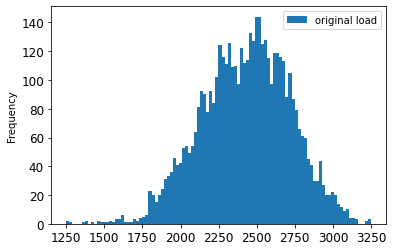

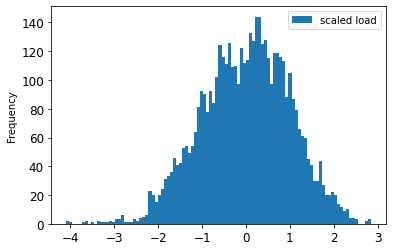

In [8]:
stlf_data[stlf_data.index <= 4800][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4800][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

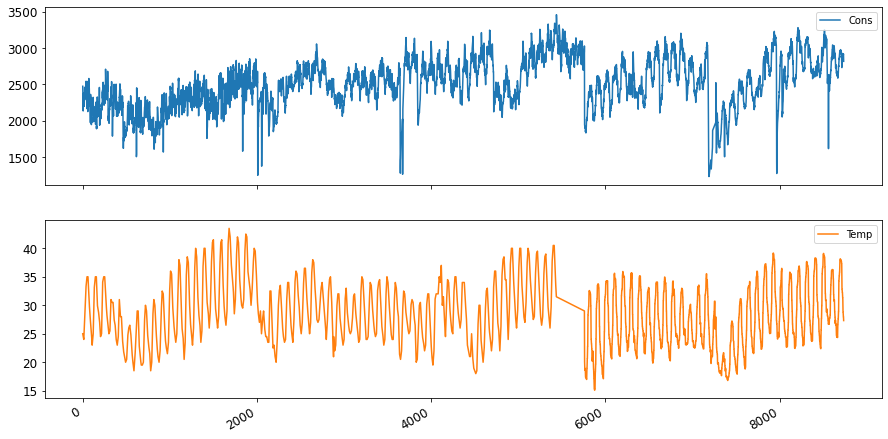

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,0.158209,-0.740413,1.238689,-1.660674,1.511373,-1.457264,-0.237839,-0.623175,-0.418753,-0.162010,-0.272920,-0.486151,-0.224629,-0.039674
1,-0.039674,-0.756691,1.277026,-1.660674,1.511373,-1.457264,-0.123269,-0.619703,-0.543769,-0.453566,-0.614835,-0.720941,-0.180076,-0.699287
2,-0.699287,-0.772969,1.315363,-1.660674,1.511373,-1.457264,0.730797,-0.258623,-0.634059,-0.658350,-1.341853,-1.272511,-0.185914,-0.772191
3,-0.772191,-0.789246,1.353699,-1.660674,1.511373,-1.457264,0.453052,-0.286398,-0.554187,-0.606286,-1.151101,-1.332140,-0.205271,-0.883284
4,-0.883284,-0.805524,1.392036,-1.516238,1.511373,-1.457264,0.157948,-0.237791,-0.623641,-0.762477,-1.212285,-1.384316,-0.228316,-1.018678
5,-1.018678,-0.821802,1.430373,-1.516238,1.511373,-1.457264,-0.039945,-0.123218,-0.620168,-0.800657,-1.233880,-1.522208,-0.263651,-0.702758
6,-0.702758,-0.838080,1.468709,-1.516238,1.511373,-1.457264,-0.699590,0.730876,-0.259009,-0.745123,-1.053925,-1.250150,-0.302981,-0.685400
7,-0.685400,-0.854357,1.507046,-1.516238,1.511373,-1.457264,-0.772498,0.453122,-0.286791,-0.866604,-0.963947,-1.347048,-0.338316,-0.827738
8,-0.827738,-0.870635,1.545383,-1.371801,1.511373,-1.457264,-0.883596,0.158008,-0.238173,-0.946435,-1.118709,-1.507301,-0.390551,-0.723588
9,-0.723588,-0.886913,1.583719,-1.371801,1.511373,-1.457264,-1.018997,-0.039892,-0.123575,-0.561165,-1.169096,-1.276238,-0.443707,-0.178540


In [11]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4791,-0.994376,-1.139958,0.473947,1.372493,1.017357,0.686218,-0.574605,-0.095443,0.011860,1.465845,1.429454,1.023213,-0.421584,-0.987433
4792,-0.987433,-1.077807,0.438100,1.516930,1.017357,0.686218,-0.689175,-0.223904,0.161185,1.424194,1.371868,1.004579,-0.523288,-0.629854
4793,-0.629854,-1.015655,0.402252,1.516930,1.017357,0.686218,-0.796801,-0.341949,0.057005,1.604681,1.544625,1.407076,-0.584127,-0.428499
4794,-0.428499,-0.953504,0.366405,1.516930,1.017357,0.686218,-0.831519,-0.477354,0.043114,2.028132,2.106085,1.626958,-0.625914,-0.466687
4795,-0.466687,-0.891352,0.330558,1.516930,1.017357,0.686218,-0.994694,-0.574568,-0.095793,2.031603,1.803760,1.753670,-0.658791,-0.546534
4796,-0.546534,-0.829201,0.294710,1.661366,1.017357,0.686218,-0.987751,-0.689142,-0.224282,1.913592,1.846950,1.723856,-0.687367,-0.522233
4797,-0.522233,-0.767049,0.258863,1.661366,1.017357,0.686218,-0.630154,-0.796771,-0.342354,2.003836,2.098887,1.790939,-0.703345,-0.251445
4798,-0.251445,-0.704898,0.223016,1.661366,1.017357,0.686218,-0.428789,-0.831491,-0.477788,2.180852,2.358022,1.973553,-0.683373,-0.303519
4799,-0.303519,-0.642746,0.187169,1.661366,1.017357,0.686218,-0.466979,-0.994671,-0.575024,2.076725,1.890139,1.861748,-0.659406,-0.428499
4800,-0.428499,-0.642746,0.187169,-1.660674,1.511373,-1.457264,-0.546830,-0.987727,-0.689622,1.694925,1.670594,1.667953,-0.636361,NaN


In [12]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.interpolate()

In [13]:
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4791,-0.994376,-1.139958,0.473947,1.372493,1.017357,0.686218,-0.574605,-0.095443,0.011860,1.465845,1.429454,1.023213,-0.421584,-0.987433
4792,-0.987433,-1.077807,0.438100,1.516930,1.017357,0.686218,-0.689175,-0.223904,0.161185,1.424194,1.371868,1.004579,-0.523288,-0.629854
4793,-0.629854,-1.015655,0.402252,1.516930,1.017357,0.686218,-0.796801,-0.341949,0.057005,1.604681,1.544625,1.407076,-0.584127,-0.428499
4794,-0.428499,-0.953504,0.366405,1.516930,1.017357,0.686218,-0.831519,-0.477354,0.043114,2.028132,2.106085,1.626958,-0.625914,-0.466687
4795,-0.466687,-0.891352,0.330558,1.516930,1.017357,0.686218,-0.994694,-0.574568,-0.095793,2.031603,1.803760,1.753670,-0.658791,-0.546534
4796,-0.546534,-0.829201,0.294710,1.661366,1.017357,0.686218,-0.987751,-0.689142,-0.224282,1.913592,1.846950,1.723856,-0.687367,-0.522233
4797,-0.522233,-0.767049,0.258863,1.661366,1.017357,0.686218,-0.630154,-0.796771,-0.342354,2.003836,2.098887,1.790939,-0.703345,-0.251445
4798,-0.251445,-0.704898,0.223016,1.661366,1.017357,0.686218,-0.428789,-0.831491,-0.477788,2.180852,2.358022,1.973553,-0.683373,-0.303519
4799,-0.303519,-0.642746,0.187169,1.661366,1.017357,0.686218,-0.466979,-0.994671,-0.575024,2.076725,1.890139,1.861748,-0.659406,-0.428499
4800,-0.428499,-0.642746,0.187169,-1.660674,1.511373,-1.457264,-0.546830,-0.987727,-0.689622,1.694925,1.670594,1.667953,-0.636361,-0.428499


In [14]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
0,-0.039674
1,-0.699287
2,-0.772191
3,-0.883284
4,-1.018678
...,...
4796,-0.522233
4797,-0.251445
4798,-0.303519
4799,-0.428499


In [15]:
X_train = train_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.158209,-0.740413,1.238689,-1.660674,1.511373,-1.457264,-0.237839,-0.623175,-0.418753,-0.162010,-0.272920,-0.486151,-0.224629
1,-0.039674,-0.756691,1.277026,-1.660674,1.511373,-1.457264,-0.123269,-0.619703,-0.543769,-0.453566,-0.614835,-0.720941,-0.180076
2,-0.699287,-0.772969,1.315363,-1.660674,1.511373,-1.457264,0.730797,-0.258623,-0.634059,-0.658350,-1.341853,-1.272511,-0.185914
3,-0.772191,-0.789246,1.353699,-1.660674,1.511373,-1.457264,0.453052,-0.286398,-0.554187,-0.606286,-1.151101,-1.332140,-0.205271
4,-0.883284,-0.805524,1.392036,-1.516238,1.511373,-1.457264,0.157948,-0.237791,-0.623641,-0.762477,-1.212285,-1.384316,-0.228316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,-0.546534,-0.829201,0.294710,1.661366,1.017357,0.686218,-0.987751,-0.689142,-0.224282,1.913592,1.846950,1.723856,-0.687367
4797,-0.522233,-0.767049,0.258863,1.661366,1.017357,0.686218,-0.630154,-0.796771,-0.342354,2.003836,2.098887,1.790939,-0.703345
4798,-0.251445,-0.704898,0.223016,1.661366,1.017357,0.686218,-0.428789,-0.831491,-0.477788,2.180852,2.358022,1.973553,-0.683373
4799,-0.303519,-0.642746,0.187169,1.661366,1.017357,0.686218,-0.466979,-0.994671,-0.575024,2.076725,1.890139,1.861748,-0.659406


In [16]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4801, 13, 1)

In [17]:
valid = stlf_data.copy()[(stlf_data.index >=4801) & (stlf_data.index <=5760)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,2284.0,26.291667,42.916667,1.0,7.0,0.0,2279.0,2248.0,2200.0,2908.0,2811.0,2810.0,2263.916667
4802,2286.0,27.083333,40.833333,1.0,7.0,0.0,2357.0,2306.0,2190.0,2871.0,2766.0,2807.0,2271.916667
4803,2264.0,27.875000,38.750000,1.0,7.0,0.0,2342.0,2295.0,2143.0,2847.0,2786.0,2762.0,2282.000000
4804,2208.0,28.666667,36.666667,2.0,7.0,0.0,2306.0,2272.0,2145.0,2819.0,2752.0,2737.0,2287.250000
4805,2216.0,29.458333,34.583333,2.0,7.0,0.0,2284.0,2279.0,2248.0,2788.0,2672.0,2705.0,2284.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,2978.0,29.023220,64.333333,24.0,2.0,1.0,2789.0,2834.0,2699.0,3135.0,2959.0,3129.0,2830.583333
5757,2934.0,29.015480,65.000000,24.0,2.0,1.0,2792.0,2882.0,2696.0,3102.0,2955.0,3218.0,2850.416667
5758,2948.0,29.007740,65.666667,24.0,2.0,1.0,2880.0,2785.0,2764.0,3125.0,2938.0,3318.0,2865.750000
5759,3029.0,29.000000,66.333333,24.0,2.0,1.0,2981.0,2799.0,2787.0,3138.0,2990.0,3290.0,2885.916667


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,-1.787114,-1.487427,0.583888,-1.661325,1.440244,-1.227407,-1.788045,-1.871733,-2.000471,0.456254,0.152161,0.213373,-1.886085
4802,-1.780381,-1.291810,0.420189,-1.661325,1.440244,-1.227407,-1.526496,-1.678499,-2.033432,0.340292,0.012016,0.203769,-1.858519
4803,-1.854447,-1.096192,0.256490,-1.661325,1.440244,-1.227407,-1.576794,-1.715147,-2.188348,0.265073,0.074303,0.059723,-1.823775
4804,-2.042980,-0.900575,0.092791,-1.516862,1.440244,-1.227407,-1.697509,-1.791774,-2.181756,0.177319,-0.031585,-0.020303,-1.805686
4805,-2.016046,-0.704957,-0.070908,-1.516862,1.440244,-1.227407,-1.771279,-1.768453,-1.842258,0.080161,-0.280731,-0.122737,-1.814874
4806,-2.073280,-0.509340,-0.234607,-1.516862,1.440244,-1.227407,-1.764573,-1.508587,-1.651084,-0.016996,-0.171730,-0.209165,-1.845598
4807,-2.103579,-0.313722,-0.398306,-1.516862,1.440244,-1.227407,-1.838343,-1.558561,-1.687341,0.001809,-0.215330,-0.253979,-1.875748
4808,-2.164179,-0.118105,-0.562005,-1.372399,1.440244,-1.227407,-2.026122,-1.678499,-1.763152,-0.142360,-0.199759,-0.337206,-1.904462
4809,-2.167546,0.077513,-0.725704,-1.372399,1.440244,-1.227407,-1.999297,-1.751795,-1.740079,-0.198774,-0.324332,-0.471650,-1.935473
4810,-2.207946,0.273130,-0.889403,-1.372399,1.440244,-1.227407,-2.056301,-1.745132,-1.482983,-0.283395,-0.417762,-0.439639,-1.992326


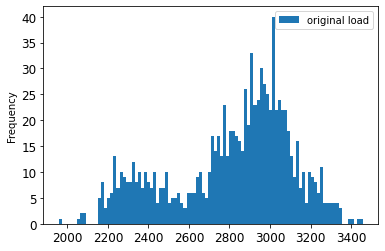

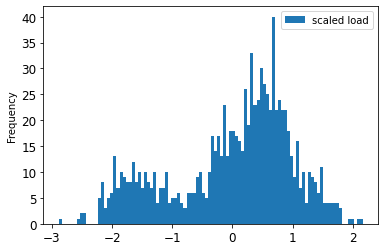

In [19]:
stlf_data[(stlf_data.index >=4801) & (stlf_data.index <=5760)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4801) & (valid.index <=5760)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4801,-1.787114,-1.487427,0.583888,-1.661325,1.440244,-1.227407,-1.788045,-1.871733,-2.000471,0.456254,0.152161,0.213373,-1.886085,-1.780381
4802,-1.780381,-1.291810,0.420189,-1.661325,1.440244,-1.227407,-1.526496,-1.678499,-2.033432,0.340292,0.012016,0.203769,-1.858519,-1.854447
4803,-1.854447,-1.096192,0.256490,-1.661325,1.440244,-1.227407,-1.576794,-1.715147,-2.188348,0.265073,0.074303,0.059723,-1.823775,-2.042980
4804,-2.042980,-0.900575,0.092791,-1.516862,1.440244,-1.227407,-1.697509,-1.791774,-2.181756,0.177319,-0.031585,-0.020303,-1.805686,-2.016046
4805,-2.016046,-0.704957,-0.070908,-1.516862,1.440244,-1.227407,-1.771279,-1.768453,-1.842258,0.080161,-0.280731,-0.122737,-1.814874,-2.073280
4806,-2.073280,-0.509340,-0.234607,-1.516862,1.440244,-1.227407,-1.764573,-1.508587,-1.651084,-0.016996,-0.171730,-0.209165,-1.845598,-2.103579
4807,-2.103579,-0.313722,-0.398306,-1.516862,1.440244,-1.227407,-1.838343,-1.558561,-1.687341,0.001809,-0.215330,-0.253979,-1.875748,-2.164179
4808,-2.164179,-0.118105,-0.562005,-1.372399,1.440244,-1.227407,-2.026122,-1.678499,-1.763152,-0.142360,-0.199759,-0.337206,-1.904462,-2.167546
4809,-2.167546,0.077513,-0.725704,-1.372399,1.440244,-1.227407,-1.999297,-1.751795,-1.740079,-0.198774,-0.324332,-0.471650,-1.935473,-2.207946
4810,-2.207946,0.273130,-0.889403,-1.372399,1.440244,-1.227407,-2.056301,-1.745132,-1.482983,-0.283395,-0.417762,-0.439639,-1.992326,-2.137246


In [21]:
valid_shifted = valid_shifted.interpolate()

In [22]:
valid_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5751,-0.053288,-0.802909,2.004795,1.372399,-0.80648,0.814726,-0.084623,-0.292544,-0.115103,0.462522,0.242477,0.741544,-0.117305,-0.086954
5752,-0.086954,-0.804822,2.057178,1.516862,-0.80648,0.814726,0.072977,-0.369172,-0.088734,0.415511,0.195762,0.895194,-0.114720,-0.076854
5753,-0.076854,-0.806734,2.109562,1.516862,-0.80648,0.814726,0.233931,-0.379166,-0.003035,0.634898,0.040045,1.160880,-0.118740,0.219411
5754,0.219411,-0.808647,2.161946,1.516862,-0.80648,0.814726,-0.091329,-0.152616,-0.111806,1.111282,0.214448,1.340138,-0.088016,0.559443
5755,0.559443,-0.810559,2.214329,1.516862,-0.80648,0.814726,-0.044384,-0.075989,-0.279907,1.098746,0.647340,1.352943,-0.013647,0.549343
5756,0.549343,-0.812472,2.266713,1.661325,-0.80648,0.814726,-0.077916,0.080598,-0.355718,1.167696,0.613083,1.234504,0.066465,0.401210
5757,0.401210,-0.814384,2.319097,1.661325,-0.80648,0.814726,-0.067857,0.240515,-0.365606,1.064270,0.600625,1.519397,0.134804,0.448343
5758,0.448343,-0.816297,2.371480,1.661325,-0.80648,0.814726,0.227224,-0.082652,-0.141471,1.136355,0.547682,1.839501,0.187638,0.721042
5759,0.721042,-0.818209,2.423864,1.661325,-0.80648,0.814726,0.565897,-0.036009,-0.065661,1.177098,0.709627,1.749871,0.257125,-2.888010
5760,-2.888010,-3.016756,1.912151,-1.661325,-0.80648,0.814726,-2.475450,-2.484752,-2.943155,-2.029092,-1.850356,-2.152195,-2.630638,-2.888010


In [23]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4801,-1.780381
4802,-1.854447
4803,-2.042980
4804,-2.016046
4805,-2.073280
...,...
5756,0.401210
5757,0.448343
5758,0.721042
5759,-2.888010


In [24]:
X_valid = valid_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,-1.787114,-1.487427,0.583888,-1.661325,1.440244,-1.227407,-1.788045,-1.871733,-2.000471,0.456254,0.152161,0.213373,-1.886085
4802,-1.780381,-1.291810,0.420189,-1.661325,1.440244,-1.227407,-1.526496,-1.678499,-2.033432,0.340292,0.012016,0.203769,-1.858519
4803,-1.854447,-1.096192,0.256490,-1.661325,1.440244,-1.227407,-1.576794,-1.715147,-2.188348,0.265073,0.074303,0.059723,-1.823775
4804,-2.042980,-0.900575,0.092791,-1.516862,1.440244,-1.227407,-1.697509,-1.791774,-2.181756,0.177319,-0.031585,-0.020303,-1.805686
4805,-2.016046,-0.704957,-0.070908,-1.516862,1.440244,-1.227407,-1.771279,-1.768453,-1.842258,0.080161,-0.280731,-0.122737,-1.814874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,0.549343,-0.812472,2.266713,1.661325,-0.806480,0.814726,-0.077916,0.080598,-0.355718,1.167696,0.613083,1.234504,0.066465
5757,0.401210,-0.814384,2.319097,1.661325,-0.806480,0.814726,-0.067857,0.240515,-0.365606,1.064270,0.600625,1.519397,0.134804
5758,0.448343,-0.816297,2.371480,1.661325,-0.806480,0.814726,0.227224,-0.082652,-0.141471,1.136355,0.547682,1.839501,0.187638
5759,0.721042,-0.818209,2.423864,1.661325,-0.806480,0.814726,0.565897,-0.036009,-0.065661,1.177098,0.709627,1.749871,0.257125


In [25]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(960, 13, 1)


In [26]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(150, input_shape=(1,1)))
#model.add(Dropout(0.6))
#model.add(Dropout(0.6))
#model.add(Dropout(0.5))
model.add(Dropout(0.4))
model.add(Dense(16))
model.add(Dense(1))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.007)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2416      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 93,633
Trainable params: 93,633
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=12,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
401/401 [==============================] - 6s 14ms/step - loss: 0.2330 - val_loss: 0.1861
Epoch 2/300
401/401 [==============================] - 5s 12ms/step - loss: 0.1688 - val_loss: 0.1408
Epoch 3/300
401/401 [==============================] - 5s 12ms/step - loss: 0.1524 - val_loss: 0.0794
Epoch 4/300
401/401 [==============================] - 5s 12ms/step - loss: 0.1205 - val_loss: 0.0633
Epoch 5/300
401/401 [==============================] - 5s 12ms/step - loss: 0.0990 - val_loss: 0.0561
Epoch 6/300
401/401 [==============================] - 5s 12ms/step - loss: 0.0892 - val_loss: 0.0827
Epoch 7/300
401/401 [==============================] - 5s 13ms/step - loss: 0.0903 - val_loss: 0.0913
Epoch 8/300
401/401 [==============================] - 5s 14ms/step - loss: 0.0805 - val_loss: 0.0523
Epoch 9/300
401/401 [==============================] - 5s 13ms/step - loss: 0.0842 - val_loss: 0.0714
Epoch 10/300
401/401 [==============================] - 5s 12ms/step - loss: 0.076

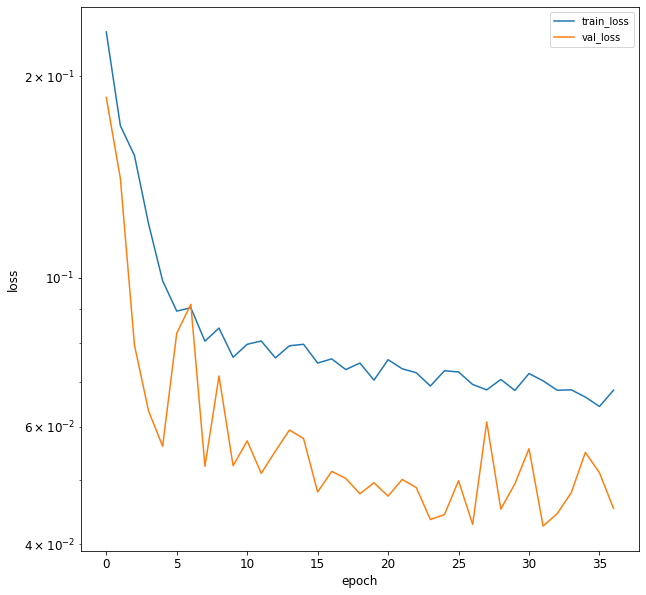

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[stlf_data.index >= 5761][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5761,1949.0,20.102451,59.820965,1.0,2.0,1.0,2050.0,2099.0,1985.0,2097.0,2135.0,2080.0,2044.833333
5762,1926.0,19.362452,62.127955,1.0,2.0,1.0,2006.0,2119.0,2039.0,2104.0,2140.0,2033.0,2035.416667
5763,1925.0,18.622452,64.434944,1.0,2.0,1.0,2011.0,2094.0,2076.0,2097.0,2117.0,2016.0,2022.833333
5764,1915.0,18.622452,64.434944,2.0,2.0,1.0,1957.0,2074.0,2064.0,2039.0,2097.0,2010.0,2010.416667
5765,1906.0,18.622452,64.434944,2.0,2.0,1.0,1949.0,2050.0,2099.0,2045.0,2073.0,2044.0,1994.333333
5766,1923.0,18.757451,63.791247,2.0,2.0,1.0,1926.0,2006.0,2119.0,2015.0,2100.0,2027.0,1978.000000
5767,1900.0,18.892450,63.147550,2.0,2.0,1.0,1925.0,2011.0,2094.0,2045.0,2067.0,2004.0,1961.833333
5768,1903.0,18.892450,63.147550,3.0,2.0,1.0,1915.0,1957.0,2074.0,2048.0,2029.0,1989.0,1947.583333
5769,1903.0,18.892450,63.147550,3.0,2.0,1.0,1906.0,1949.0,2050.0,2013.0,2056.0,1991.0,1935.333333
5770,1866.0,18.132451,62.328874,3.0,2.0,1.0,1923.0,1926.0,2006.0,1998.0,2041.0,2005.0,1923.666667


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 5761 to 8735
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2975 non-null   float64
 1   Temp    2975 non-null   float64
 2   Hum     2975 non-null   float64
 3   A       2975 non-null   float64
 4   B       2975 non-null   float64
 5   C       2975 non-null   float64
 6   D       2975 non-null   float64
 7   E       2975 non-null   float64
 8   F       2975 non-null   float64
 9   G       2975 non-null   float64
 10  H       2975 non-null   float64
 11  I       2975 non-null   float64
 12  J       2975 non-null   float64
dtypes: float64(13)
memory usage: 325.4 KB


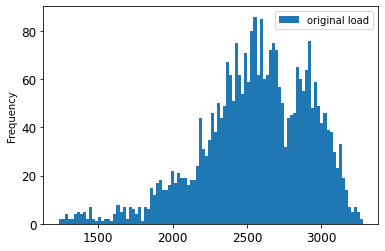

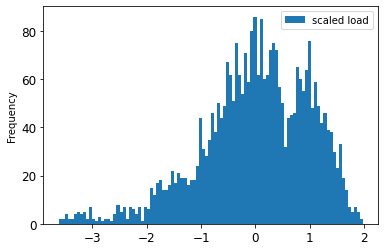

In [33]:
stlf_data[stlf_data.index >= 5761][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5761][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5761,-1.664066,-1.329113,0.401588,-1.662375,-0.981208,0.639754,-1.383310,-1.245943,-1.552896,-1.162114,-1.026393,-1.136235,-1.438832,-1.726954
5762,-1.726954,-1.463229,0.522356,-1.662375,-0.981208,0.639754,-1.503495,-1.191338,-1.405572,-1.143419,-1.013004,-1.264032,-1.465336,-1.729688
5763,-1.729688,-1.597345,0.643124,-1.662375,-0.981208,0.639754,-1.489837,-1.259595,-1.304627,-1.162114,-1.074592,-1.310256,-1.500753,-1.757031
5764,-1.757031,-1.597345,0.643124,-1.517869,-0.981208,0.639754,-1.637337,-1.314200,-1.337366,-1.317016,-1.128146,-1.326570,-1.535701,-1.781639
5765,-1.781639,-1.597345,0.643124,-1.517869,-0.981208,0.639754,-1.659189,-1.379727,-1.241878,-1.300992,-1.192412,-1.234122,-1.580969,-1.735157
5766,-1.735157,-1.572878,0.609427,-1.517869,-0.981208,0.639754,-1.722012,-1.499860,-1.187314,-1.381114,-1.120113,-1.280346,-1.626940,-1.798045
5767,-1.798045,-1.548411,0.575731,-1.517869,-0.981208,0.639754,-1.724744,-1.486208,-1.255519,-1.300992,-1.208478,-1.342885,-1.672443,-1.789842
5768,-1.789842,-1.548411,0.575731,-1.373364,-0.981208,0.639754,-1.752059,-1.633644,-1.310084,-1.292980,-1.310232,-1.383671,-1.712551,-1.789842
5769,-1.789842,-1.548411,0.575731,-1.373364,-0.981208,0.639754,-1.776642,-1.655486,-1.375561,-1.386455,-1.237933,-1.378233,-1.747030,-1.891009
5770,-1.891009,-1.686151,0.532874,-1.373364,-0.981208,0.639754,-1.730207,-1.718283,-1.495603,-1.426516,-1.278099,-1.340166,-1.779867,-1.940226


In [35]:
test_shifted = test_shifted.interpolate()
test_shifted.tail(5)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
8731,0.955353,0.099038,-0.979390,1.516752,0.049545,0.639754,0.919320,0.946475,1.017090,1.065274,1.635271,1.074372,0.975855,0.990898
8732,0.990898,0.099038,-0.979390,1.661258,0.049545,0.639754,0.919320,0.957396,0.943428,0.971798,1.605816,0.590377,0.980546,0.988164
8733,0.988164,0.099038,-0.979390,1.661258,0.049545,0.639754,0.987607,0.927363,0.978895,0.897018,1.506740,0.726331,0.981953,0.750283
8734,0.750283,-0.022391,-0.979390,1.661258,0.049545,0.639754,0.984875,0.878218,0.976167,0.977140,1.399630,0.734488,0.963189,0.712004
8735,0.712004,-0.022391,-0.822599,1.661258,0.049545,0.639754,0.957561,0.921902,0.948885,0.921055,1.206834,0.797026,0.943487,0.712004


In [36]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5761,-1.726954
5762,-1.729688
5763,-1.757031
5764,-1.781639
5765,-1.735157
...,...
8731,0.990898
8732,0.988164
8733,0.750283
8734,0.712004


In [37]:
X_test = test_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5761,-1.664066,-1.329113,0.401588,-1.662375,-0.981208,0.639754,-1.383310,-1.245943,-1.552896,-1.162114,-1.026393,-1.136235,-1.438832
5762,-1.726954,-1.463229,0.522356,-1.662375,-0.981208,0.639754,-1.503495,-1.191338,-1.405572,-1.143419,-1.013004,-1.264032,-1.465336
5763,-1.729688,-1.597345,0.643124,-1.662375,-0.981208,0.639754,-1.489837,-1.259595,-1.304627,-1.162114,-1.074592,-1.310256,-1.500753
5764,-1.757031,-1.597345,0.643124,-1.517869,-0.981208,0.639754,-1.637337,-1.314200,-1.337366,-1.317016,-1.128146,-1.326570,-1.535701
5765,-1.781639,-1.597345,0.643124,-1.517869,-0.981208,0.639754,-1.659189,-1.379727,-1.241878,-1.300992,-1.192412,-1.234122,-1.580969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,0.955353,0.099038,-0.979390,1.516752,0.049545,0.639754,0.919320,0.946475,1.017090,1.065274,1.635271,1.074372,0.975855
8732,0.990898,0.099038,-0.979390,1.661258,0.049545,0.639754,0.919320,0.957396,0.943428,0.971798,1.605816,0.590377,0.980546
8733,0.988164,0.099038,-0.979390,1.661258,0.049545,0.639754,0.987607,0.927363,0.978895,0.897018,1.506740,0.726331,0.981953
8734,0.750283,-0.022391,-0.979390,1.661258,0.049545,0.639754,0.984875,0.878218,0.976167,0.977140,1.399630,0.734488,0.963189


In [38]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2975, 13, 1)

In [39]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2975,13,1)

In [40]:
predictions = model.predict(X_test)
predictions

array([[-1.8674955 ],
       [-1.961101  ],
       [-1.9757094 ],
       ...,
       [ 0.95536363],
       [ 0.75428355],
       [ 0.7248236 ]], dtype=float32)

In [41]:
feature=stlf_data.copy()[stlf_data.index >= 6900][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    2555.97195
dtype: float64
Cons    406.382169
dtype: float64


In [42]:
load_mean=2555.97195
load_std=406.382169
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(2975, 1)


In [43]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(2975, 1)


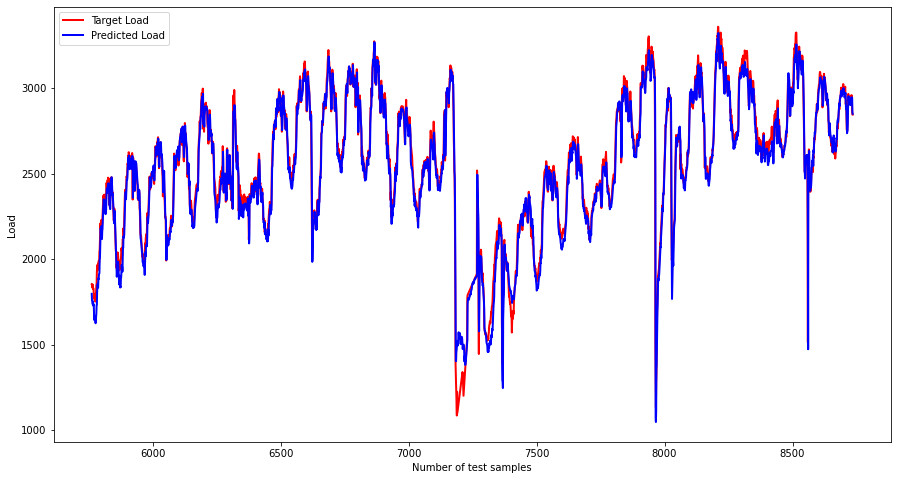

In [44]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

2.114778469969032


In [46]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1    0.608887
dtype: float64


In [47]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5761  185319.951432
5762  185210.830772
5763  184099.426941
5764  183099.438863
5765  184989.759896
...             ...
8731  295766.328615
8732  295654.818801
8733  285984.464429
8734  284431.158808
8735  284431.579566

[2975 rows x 1 columns]


In [48]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

             y_t+1
5761   3261.969904
5762   8843.931079
5763   7897.373130
5764   7974.819129
5765  13316.190168
...            ...
8731    560.693360
8732    144.086462
8733   6945.692957
8734    295.208785
8735     27.141152

[2975 rows x 1 columns]
y_t+1    5627.436697
dtype: float64


In [49]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    75.016243
dtype: float64


In [50]:
a=np.array(rescaled_predicted_load)

In [51]:
for i in  range(0,2879):
    b=a[i]
    print(b)

[1797.055]
[1759.0154]
[1753.0789]
[1742.6438]
[1735.4395]
[1753.3319]
[1728.1488]
[1736.3792]
[1731.0164]
[1674.6548]
[1643.8074]
[1664.2644]
[1666.8088]
[1659.995]
[1644.6161]
[1625.0449]
[1642.5636]
[1666.502]
[1683.1002]
[1729.7942]
[1731.5588]
[1809.9034]
[1834.9441]
[1855.9824]
[1834.6368]
[1833.3684]
[1887.6919]
[1882.7996]
[1908.2021]
[1914.9473]
[1918.1111]
[1996.5952]
[2004.9532]
[2071.7058]
[2118.0122]
[2180.1636]
[2144.961]
[2143.3853]
[2193.4617]
[2159.267]
[2117.5579]
[2165.467]
[2176.5088]
[2220.4]
[2262.8757]
[2304.1064]
[2332.7195]
[2350.2666]
[2329.9258]
[2331.0352]
[2344.586]
[2306.9443]
[2293.5544]
[2302.8918]
[2263.1768]
[2337.2869]
[2286.6338]
[2344.277]
[2385.8118]
[2413.469]
[2389.6506]
[2388.1533]
[2396.3357]
[2429.729]
[2410.6147]
[2443.1887]
[2433.9932]
[2441.708]
[2404.7834]
[2348.1846]
[2312.4314]
[2363.4897]
[2292.6191]
[2361.013]
[2409.3396]
[2461.615]
[2449.061]
[2477.1196]
[2479.017]
[2444.6033]
[2402.4094]
[2375.8591]
[2382.7183]
[2352.7021]
[2322.1824

[2580.5554]
[2594.597]
[2555.082]
[2577.1116]
[2588.7595]
[2618.182]
[2656.8638]
[2717.851]
[2818.654]
[2888.54]
[2844.5054]
[2852.024]
[2901.079]
[2891.393]
[2881.0889]
[2897.0056]
[2948.8044]
[2983.896]
[2985.878]
[2975.1372]
[2976.6465]
[3026.4978]
[3047.2588]
[2973.9292]
[2935.0073]
[2942.869]
[2924.823]
[2935.63]
[2973.8367]
[2955.3267]
[2963.7544]
[2978.3638]
[2985.234]
[3033.3877]
[3044.208]
[3054.4492]
[3042.4473]
[3071.461]
[3095.019]
[3079.456]
[3109.9153]
[3108.3625]
[3071.781]
[3041.1902]
[3050.2222]
[3020.3735]
[2999.6912]
[2913.1475]
[2869.0723]
[2899.582]
[2978.5483]
[3021.2764]
[3067.2856]
[3070.8271]
[3018.0032]
[3005.2466]
[2976.5225]
[2979.8416]
[2955.4475]
[2904.5012]
[2886.7263]
[2828.196]
[2815.1572]
[2808.0195]
[2845.2424]
[2839.7036]
[2697.2007]
[2536.4692]
[2215.66]
[1984.1669]
[2000.5012]
[2102.38]
[2180.4163]
[2174.4104]
[2194.8572]
[2205.4045]
[2228.07]
[2225.7927]
[2276.1536]
[2248.6]
[2255.189]
[2240.1174]
[2248.1155]
[2218.9531]
[2170.8733]
[2231.2837]
[2

[1652.5776]
[1724.386]
[1767.5916]
[1795.5989]
[2050.335]
[2073.882]
[2085.1465]
[2048.54]
[2019.8113]
[2011.9868]
[1996.4019]
[2007.96]
[1987.603]
[1961.5514]
[1942.9736]
[1931.0879]
[1956.916]
[1975.2505]
[1966.9373]
[1943.6289]
[1928.248]
[1900.5833]
[1884.4141]
[1853.1542]
[1841.5864]
[1835.4829]
[1828.156]
[1821.6748]
[1814.3247]
[1816.1783]
[1810.0433]
[1799.0918]
[1783.9268]
[1776.9753]
[1763.3716]
[1743.9209]
[1760.4307]
[1783.9409]
[1779.4998]
[1768.4011]
[1769.8577]
[1774.0508]
[1765.5554]
[1794.0203]
[1810.4214]
[1818.9434]
[1841.3444]
[1849.8235]
[1856.9326]
[1888.4978]
[1906.7997]
[1905.6238]
[1899.9697]
[1901.9795]
[1919.2959]
[1965.5033]
[1990.9641]
[2075.1924]
[2108.893]
[2151.5598]
[2123.3054]
[2130.196]
[2149.8684]
[2147.1392]
[2153.8308]
[2191.1667]
[2214.349]
[2223.421]
[2217.0815]
[2235.7402]
[2248.7302]
[2259.5469]
[2255.7715]
[2265.9402]
[2249.4417]
[2237.198]
[2196.099]
[2227.8306]
[2250.375]
[2274.6426]
[2289.8433]
[2290.9995]
[2320.17]
[2316.1365]
[2281.725]
[

[3036.3396]
[2997.1006]
[3074.4338]
[3076.9792]
[3070.3657]
[3108.9246]
[3135.667]
[3102.3018]
[3043.527]
[3029.6926]
[2973.1006]
[2946.322]
[2969.1453]
[3005.8372]
[3062.3518]
[3115.5156]
[3119.4275]
[3122.1948]
[3056.8303]
[3063.9365]
[3054.3984]
[3017.617]
[2983.9297]
[2945.7073]
[2894.6077]
[2848.166]
[2805.2334]
[2834.747]
[2845.064]
[2802.6223]
[2759.2708]
[2619.1748]
[2546.9653]
[2598.6816]
[2514.8384]
[2470.2485]
[2474.3562]
[2472.1946]
[2481.4185]
[2495.8516]
[2491.873]
[2502.0242]
[2496.679]
[2474.316]
[2473.0679]
[2456.0261]
[2431.36]
[2429.2356]
[2443.8296]
[2457.7498]
[2465.0474]
[2505.7522]
[2529.863]
[2539.8987]
[2580.7322]
[2583.4895]
[2580.4556]
[2562.796]
[2587.0337]
[2595.491]
[2610.4402]
[2602.354]
[2651.881]
[2650.1113]
[2666.4067]
[2692.2773]
[2721.3745]
[2783.0906]
[2867.3647]
[2926.978]
[2961.4045]
[3004.2378]
[3054.6462]
[3088.9233]
[3103.5588]
[3131.3633]
[3202.6057]
[3156.0676]
[3214.5178]
[3240.5793]
[3236.4658]
[3289.7756]
[3281.3765]
[3312.066]
[3322.9333]